<a href="https://colab.research.google.com/github/r-diazp/DeepL/blob/master/Learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [7]:
#@title Functions 
#Funtions  
def plot_decision_boundary(model, X, y, figsize=(10, 7)):
  """
  https://cs231n.github.io/neural-networks-case-study/
  https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.figure(figsize=(10, 7))
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [2]:
# Plot the learning rate versus the loss
def plot_best_learning_rate(model, epochs, start_lr: float = 1e-7, end_lr: float = 10, figsize=(10, 7) ):
  lrs = start_lr * (10 ** (np.arange(epochs)/20))
  plt.figure(figsize=figsize)
  plt.semilogx(lrs, model.history["loss"]) 
  plt.xlabel("Learning Rate")
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");

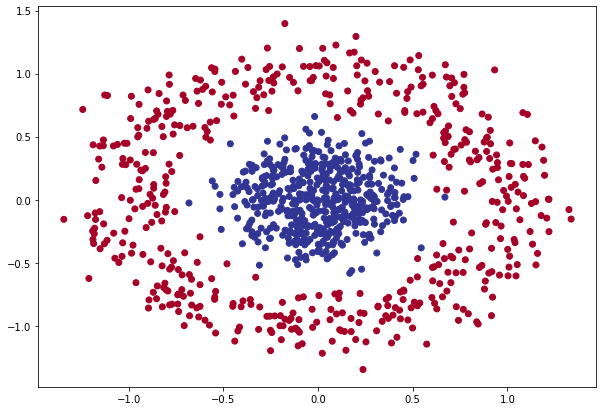

In [3]:
# Make 1000 examples
n_samples = 1000

# Create dataset
X_train, y_train = make_circles(n_samples=n_samples, 
                                factor=0.25, 
                                noise=0.15, 
                                random_state=50)

plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

In [10]:
# 1. Set random seed
tf.random.set_seed(50)

# 2. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="tanh"),
  tf.keras.layers.Dense(1, activation="sigmoid")])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.build(input_shape=(1,2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (1, 4)                    12        
                                                                 
 dense_4 (Dense)             (1, 1)                    5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.7173 - accuracy: 0.5050
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5200
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5410
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.5490
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5620
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5760
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5840
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5860
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5890
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.6080
Epoch 11/20
32/32 [

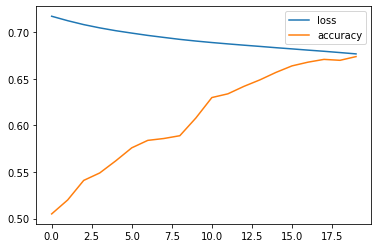

In [11]:
# 4- Fit he model
epochs = 20
model_history = model.fit(X_train, y_train,
                          epochs=epochs,
                          verbose=1)

# Plot history trainning 

pd.DataFrame(model_history.history).plot()

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


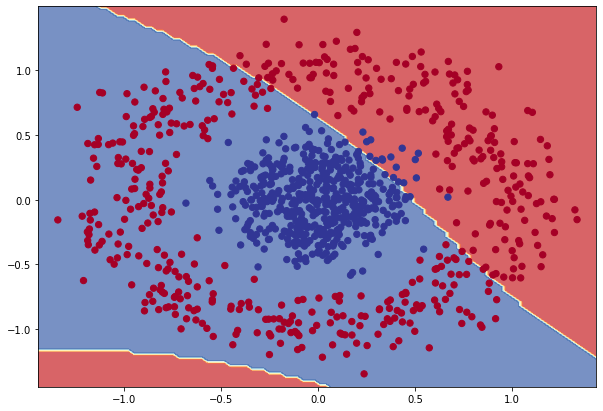

In [12]:
plot_decision_boundary(model, X_train, y_train)

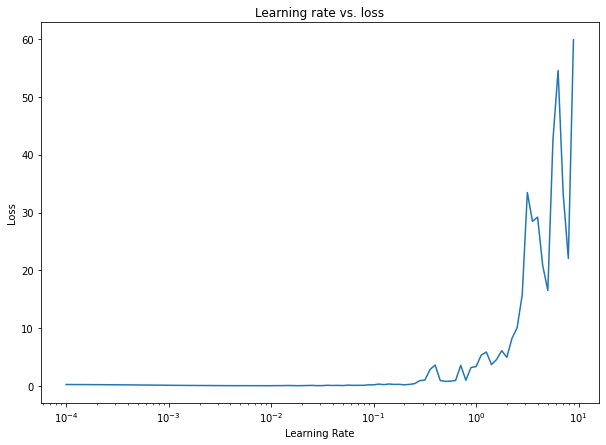

In [9]:
# 4- best learning_rate
epochs_best_learning = 100
start_lr = 1e-4
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: start_lr * 10**(epoch/20))
best_learning_rate_model = model.fit(X_train, y_train,
                          epochs=epochs_best_learning,
                          verbose=0, 
                          callbacks=[lr_scheduler])


plot_best_learning_rate(best_learning_rate_model, epochs_best_learning, start_lr=start_lr)